In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

class SimpleLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 100)
        self.linear2 = nn.Linear(100, 100)
        self.linear3 = nn.Linear(100, 100)
        self.linear4 = nn.Linear(100, 100)
        self.linear5 = nn.Linear(100, 1)
        print(self.linear1.weight.dtype)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.relu(x)
        x = self.linear4(x)
        x = F.relu(x)
        x = self.linear5(x)
        return x

# Function to match
def f(x):
    return (torch.sin(x * 5.0) + torch.cos(x) * 5.0 + x**2) * 10.0

# Training data
def get_data():
    x = torch.rand(1) * 100
    y = f(x)
    return x, y

model = SimpleLinear()
loss = torch.nn.HuberLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

torch.float32


[0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091, 1.0101010101010102, 1.1111111111111112, 1.2121212121212122, 1.3131313131313131, 1.4141414141414141, 1.5151515151515151, 1.6161616161616161, 1.7171717171717171, 1.8181818181818181, 1.9191919191919191, 2.0202020202020203, 2.121212121212121, 2.2222222222222223, 2.323232323232323, 2.4242424242424243, 2.525252525252525, 2.6262626262626263, 2.727272727272727, 2.8282828282828283, 2.929292929292929, 3.0303030303030303, 3.131313131313131, 3.2323232323232323, 3.3333333333333335, 3.4343434343434343, 3.5353535353535355, 3.6363636363636362, 3.7373737373737375, 3.8383838383838382, 3.9393939393939394, 4.040404040404041, 4.141414141414141, 4.242424242424242, 4.343434343434343, 4.444444444444445, 4.545454545454545, 4.646464646464646, 4.747474747474747, 4.848484848484849, 4.94949494949495, 5.05050505050505, 5.1515151

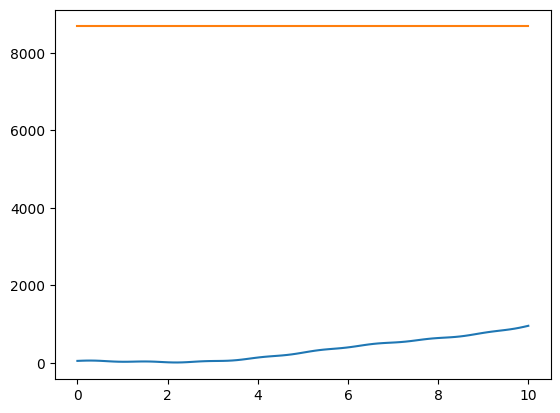

In [6]:
for i in range(100):
    x, y = get_data()
    y_pred = model.forward(x)
    l = loss(y_pred, y)
    l.backward()
    optimizer.step()

xs = [x for x in np.linspace(0.0, 10.0, 100)]
ys = [f(torch.tensor(x)).item() for x in xs]
ys_pred = [model.forward(torch.tensor(x, dtype=torch.float32).view((1,1))).item() for x in xs]
print(xs)
print(ys)
print(ys_pred)

plt.plot(xs, ys, label='f(x)')
plt.plot(xs, ys_pred, label='model(x)')
plt.show()